# 1. Importing the libraries

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# 2. Generate dataset with multiple features

In [15]:
X, y = make_regression(
    n_samples=100,
    n_features=5,
    noise=20,
    random_state=42)

# 3. Split into training and testing sets

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Initialize models

In [17]:
lr = LinearRegression()
ridge = Ridge(alpha=1.0)
lasso = Lasso(alpha=0.1)

#  5. Fit models

In [18]:
lr.fit(X_train, y_train)
ridge.fit(X_train, y_train)
lasso.fit(X_train, y_train)

Lasso(alpha=0.1)

# 6. Predictions

In [19]:
y_pred_lr = lr.predict(X_test)
y_pred_ridge = ridge.predict(X_test)
y_pred_lasso = lasso.predict(X_test)

# 7. Evaluate models

In [20]:
def evaluate_model(name, y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"{name} -> MSE: {mse:.2f}, R²: {r2:.2f}")

print("\nModel Evaluation Results:")
evaluate_model("Linear Regression", y_test, y_pred_lr)
evaluate_model("Ridge Regression", y_test, y_pred_ridge)
evaluate_model("Lasso Regression", y_test, y_pred_lasso)


Model Evaluation Results:
Linear Regression -> MSE: 453.79, R²: 0.98
Ridge Regression -> MSE: 466.27, R²: 0.98
Lasso Regression -> MSE: 453.91, R²: 0.98


# 8. Compare Coefficients

In [21]:
coef_df = pd.DataFrame({
    "Feature": [f"X{i+1}" for i in range(X.shape[1])],
    "Linear": lr.coef_,
    "Ridge": ridge.coef_,
    "Lasso": lasso.coef_,
})

print("\nCoefficient Comparison:")
print(coef_df)


Coefficient Comparison:
  Feature     Linear      Ridge      Lasso
0      X1  62.466696  61.742652  62.382827
1      X2  98.293549  96.800329  98.168568
2      X3  57.607675  56.423747  57.443800
3      X4  54.005171  53.316678  53.903317
4      X5  36.338552  36.055399  36.254520


# 9. Visualize coefficient shrinkage

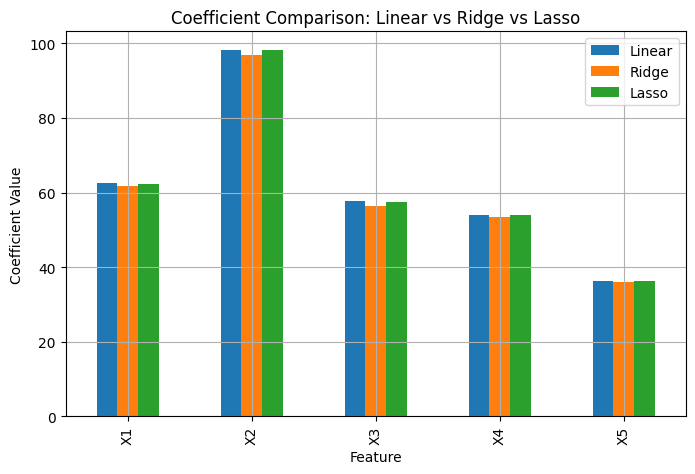

In [13]:
coef_df.plot(x="Feature", kind="bar", figsize=(8,5))
plt.title("Coefficient Comparison: Linear vs Ridge vs Lasso")
plt.ylabel("Coefficient Value")
plt.grid(True)
plt.show()